In [1]:
import numpy as np
import pandas as pd

In [28]:
data_mart_weekly_sales = pd.read_csv(r"C:\Users\THINKPAD\Desktop\PANDAS_CASE_STUDY\Case_study_5\data_mart_weekly_sales.csv",index_col = 0)

In [29]:
data_mart_weekly_sales

,week_date,region,platform,segment,customer_type,transactions,sales
0,31/8/20,ASIA,Retail,C3,New,120631,3656163
1,31/8/20,ASIA,Retail,F1,New,31574,996575
2,31/8/20,USA,Retail,NaN,Guest,529151,16509610
3,31/8/20,EUROPE,Retail,C1,New,4517,141942
4,31/8/20,AFRICA,Retail,C2,New,58046,1758388
...,...,...,...,...,...,...,...
17112,26/3/18,AFRICA,Retail,C3,New,98342,3706066
17113,26/3/18,USA,Shopify,C4,New,16,2784
17114,26/3/18,USA,Retail,F2,New,25665,1064172
17115,26/3/18,EUROPE,Retail,C4,New,883,33523


In [30]:
data_mart_weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17117 entries, 0 to 17116
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   week_date      17117 non-null  object
 1   region         17117 non-null  object
 2   platform       17117 non-null  object
 3   segment        14093 non-null  object
 4   customer_type  17117 non-null  object
 5   transactions   17117 non-null  int64 
 6   sales          17117 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


# Data Cleansing Steps

In a single query, perform the following operations and generate a new table in the data_mart schema named clean_weekly_sales:

Convert the week_date to a DATE format

Add a week_number as the second column for each week_date value, for example any value from the 1st of January to 7th of January will be 1, 8th to 14th will be 2 etc

Add a month_number with the calendar month for each week_date value as the 3rd column

Add a calendar_year column as the 4th column containing either 2018, 2019 or 2020 values

Add a new column called age_band after the original segment column using the following mapping on the number inside the segment value

segment	age_band
1	Young Adults
2	Middle Aged
3 or 4	Retirees
Add a new demographic column using the following mapping for the first letter in the segment values:
segment	demographic
C	Couples
F	Families
Ensure all null string values with an "unknown" string value in the original segment column as well as the new age_band and demographic columns

Generate a new avg_transaction column as the sales value divided by transactions rounded to 2 decimal places for each record


In [31]:
data_mart_weekly_sales['week_date'] = data_mart_weekly_sales['week_date'].apply(pd.to_datetime)

#data_mart_weekly_sales['week_date'] = data_mart_weekly_sales['week_date'].dt.date

In [32]:
data_mart_weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17117 entries, 0 to 17116
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   week_date      17117 non-null  datetime64[ns]
 1   region         17117 non-null  object        
 2   platform       17117 non-null  object        
 3   segment        14093 non-null  object        
 4   customer_type  17117 non-null  object        
 5   transactions   17117 non-null  int64         
 6   sales          17117 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.0+ MB


In [36]:
# Convert 'week_date' to datetime format
data_mart_weekly_sales['week_date'] = pd.to_datetime(data_mart_weekly_sales['week_date'], format='%d/%m/%y')

# Define a custom function for calculating the week number
def custom_week(date):
    return (date.dt.day - 1) // 7 + 1
 
# Apply the transformations to create the clean_weekly_sales DataFrame
clean_weekly_sales = pd.DataFrame({
    'week_date': data_mart_weekly_sales['week_date'],
    'week_number': custom_week(data_mart_weekly_sales['week_date']),
    'month_number': data_mart_weekly_sales['week_date'].dt.month,
    'calendar_year': data_mart_weekly_sales['week_date'].dt.year,
    'region': data_mart_weekly_sales['region'],
    'platform': data_mart_weekly_sales['platform'],
    'segment': data_mart_weekly_sales['segment'].astype(str),  # Convert to string
    'customer_type': data_mart_weekly_sales['customer_type'],
    'age_band': data_mart_weekly_sales['segment'].astype(str).apply(lambda x: 'Young Adults' if x[-1] == '1' else ('Middle Aged' if x[-1] == '2' else ('Retirees' if x[-1] in ['3', '4'] else 'unknown'))),
    'demographic': data_mart_weekly_sales['segment'].astype(str).apply(lambda x: 'Couples' if x[0] == 'C' else ('Families' if x[0] == 'F' else 'unknown')),
    'transactions': data_mart_weekly_sales['transactions'],
    'sales': data_mart_weekly_sales['sales'],
    'avg_transaction': round(data_mart_weekly_sales['sales'].astype(float) / data_mart_weekly_sales['transactions'], 2)
})

# Display the first few rows of the resulting DataFrame
clean_weekly_sales.head()

,week_date,week_number,month_number,calendar_year,region,platform,segment,customer_type,age_band,demographic,transactions,sales,avg_transaction
0,2020-08-31,5,8,2020,ASIA,Retail,C3,New,Retirees,Couples,120631,3656163,30.31
1,2020-08-31,5,8,2020,ASIA,Retail,F1,New,Young Adults,Families,31574,996575,31.56
2,2020-08-31,5,8,2020,USA,Retail,nan,Guest,unknown,unknown,529151,16509610,31.20
3,2020-08-31,5,8,2020,EUROPE,Retail,C1,New,Young Adults,Couples,4517,141942,31.42
4,2020-08-31,5,8,2020,AFRICA,Retail,C2,New,Middle Aged,Couples,58046,1758388,30.29


- This part creates the clean_weekly_sales DataFrame by applying various transformations:

- 'week_date': The original 'week_date' column.
- 'week_number': Calculated using the custom_week function.
- 'month_number': Extracted from the 'week_date' using dt.month.
- 'calendar_year': Extracted from the 'week_date' using dt.year.
- 'region', 'platform', 'customer_type': Copied from the original DataFrame.
- 'segment': Converted to string to ensure uniform data type.
- 'age_band': Derived using a lambda function that maps the last character of 'segment' to specific age bands.
- 'demographic': Derived using a lambda function that maps the first character of 'segment' to specific demographic groups.
- 'transactions' and 'sales': Copied from the original DataFrame.
- 'avg_transaction': Calculated as the rounded ratio of 'sales' to 'transactions'.

# Data Exploration

### 1.What day of the week is used for each week_date value?

In [38]:
# Create a DataFrame with distinct day names
unique_week_days_df = pd.DataFrame({'week_day': clean_weekly_sales['week_date'].dt.day_name().unique()})

# Display the result
unique_week_days_df

,week_day
0,Monday
1,Thursday
2,Sunday
3,Saturday
4,Wednesday
5,Friday
6,Tuesday


### 2. What range of week numbers are missing from the dataset?

In [44]:
# Generate a series of all possible week numbers from 1 to 53
all_week_numbers = pd.Series(range(1, 54), name='all_week_numbers')

# Get the unique week numbers from your dataset
existing_week_numbers = clean_weekly_sales['week_number'].unique()

# Find the missing week numbers
missing_week_numbers = all_week_numbers[~all_week_numbers.isin(existing_week_numbers)]

# Display the result
missing_week_numbers.tolist()

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

### 3. How many total transactions were there for each year in the dataset?

In [46]:
# Group by 'calendar_year' and calculate the sum of 'transactions'
total_transactions_by_year = clean_weekly_sales.groupby('calendar_year')['transactions'].sum().reset_index()

# Sort the result by total transactions in ascending order
total_transactions_by_year = total_transactions_by_year.sort_values(by='transactions')

# Display the result
total_transactions_by_year

,calendar_year,transactions
0,2018,346406460
1,2019,365639285
2,2020,375813651


In [48]:
clean_weekly_sales

,week_date,week_number,month_number,calendar_year,region,platform,segment,customer_type,age_band,demographic,transactions,sales,avg_transaction,day_of_week
0,2020-08-31,5,8,2020,ASIA,Retail,C3,New,Retirees,Couples,120631,3656163,30.31,Monday
1,2020-08-31,5,8,2020,ASIA,Retail,F1,New,Young Adults,Families,31574,996575,31.56,Monday
2,2020-08-31,5,8,2020,USA,Retail,nan,Guest,unknown,unknown,529151,16509610,31.20,Monday
3,2020-08-31,5,8,2020,EUROPE,Retail,C1,New,Young Adults,Couples,4517,141942,31.42,Monday
4,2020-08-31,5,8,2020,AFRICA,Retail,C2,New,Middle Aged,Couples,58046,1758388,30.29,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17112,2018-03-26,4,3,2018,AFRICA,Retail,C3,New,Retirees,Couples,98342,3706066,37.69,Monday
17113,2018-03-26,4,3,2018,USA,Shopify,C4,New,Retirees,Couples,16,2784,174.00,Monday
17114,2018-03-26,4,3,2018,USA,Retail,F2,New,Middle Aged,Families,25665,1064172,41.46,Monday
17115,2018-03-26,4,3,2018,EUROPE,Retail,C4,New,Retirees,Couples,883,33523,37.96,Monday


### 4. What is the total sales for each region for each month?

In [56]:
# Convert 'month_number' to a datetime object and extract the month name
clean_weekly_sales['month'] = pd.to_datetime(clean_weekly_sales['month_number'], format='%m').dt.month_name()

# Group by 'region', 'month_number', and 'month', calculate the sum of 'sales'
total_sales_by_region_month = clean_weekly_sales.groupby(['region', 'month_number', 'month'])['sales'].sum().reset_index()

# Display the result
total_sales_by_region_month

,region,month_number,month,sales
0,AFRICA,1,January,427463008
1,AFRICA,2,February,410479820
2,AFRICA,3,March,976649920
3,AFRICA,4,April,1484486866
4,AFRICA,5,May,1228503841
...,...,...,...,...
79,USA,8,August,607134343
80,USA,9,September,104026897
81,USA,10,October,110297768
82,USA,11,November,109048148


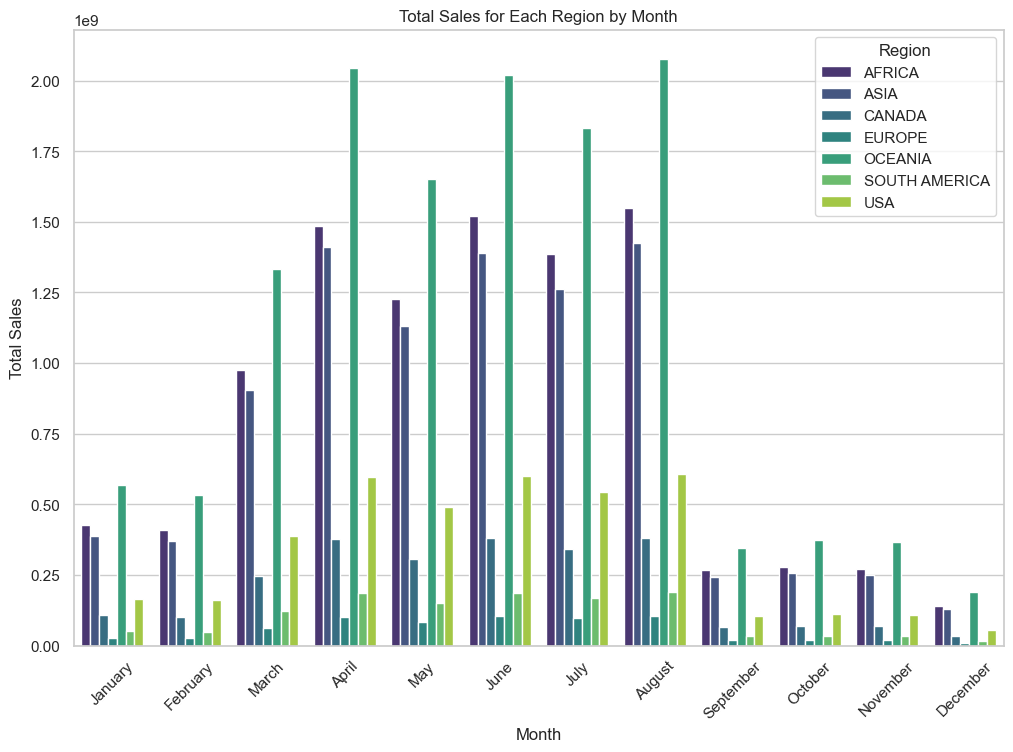

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named total_sales_by_region_month
# If not, replace 'total_sales_by_region_month' with the actual name of your DataFrame

# Set the plotting style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='sales', hue='region', data=total_sales_by_region_month, palette='viridis')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Region by Month')

# Show legend
plt.legend(title='Region', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### 5. What is the total count of transactions for each platform?

In [59]:
total_transactions_by_platform = clean_weekly_sales.groupby('platform')['transactions'].sum().reset_index()

# Display the result
total_transactions_by_platform

,platform,transactions
0,Retail,1081934227
1,Shopify,5925169


### 6. What is the percentage of sales for Retail vs Shopify for each month?

In [61]:
# Filter the DataFrame for Retail and Shopify platforms
filtered_df = clean_weekly_sales[clean_weekly_sales['platform'].isin(['Retail', 'Shopify'])]

# Group by 'platform', 'month_number', and calculate the sum of 'sales'
total_sales_by_platform_month = filtered_df.groupby(['platform', 'month_number'])['sales'].sum().reset_index()

# Pivot the DataFrame to have 'Retail' and 'Shopify' as columns
pivot_df = total_sales_by_platform_month.pivot(index='month_number', columns='platform', values='sales').reset_index()

# Calculate the percentage of sales for 'Retail' and 'Shopify'
pivot_df['Retail_percentage'] = (pivot_df['Retail'] / (pivot_df['Retail'] + pivot_df['Shopify'])) * 100
pivot_df['Shopify_percentage'] = (pivot_df['Shopify'] / (pivot_df['Retail'] + pivot_df['Shopify'])) * 100

# Display the result
pivot_df[['month_number', 'Retail_percentage', 'Shopify_percentage']]

platform,month_number,Retail_percentage,Shopify_percentage
0,1,97.378191,2.621809
1,2,97.603182,2.396818
2,3,97.437561,2.562439
3,4,97.460189,2.539811
4,5,97.338261,2.661739
5,6,97.247086,2.752914
6,7,97.225531,2.774469
7,8,97.221413,2.778587
8,9,97.890721,2.109279
9,10,96.908850,3.091150


### 7. What is the percentage of sales by demographic for each year in the dataset?



In [65]:
# Group by 'calendar_year', 'demographic', and calculate the sum of 'sales'
total_sales_by_demographic_year = clean_weekly_sales.groupby(['calendar_year', 'demographic'])['sales'].sum().reset_index()

# Pivot the DataFrame to have 'demographic' as columns
pivot_df = total_sales_by_demographic_year.pivot(index='calendar_year', columns='demographic', values='sales').reset_index()

# Calculate the percentage of sales for each demographic
pivot_df['Total'] = pivot_df.sum(axis=1)  # Calculate the total sales for each year
demographics = pivot_df.columns[1:-1]  # Extract demographic columns
for demo in demographics:
    pivot_df[f'{demo}_percentage'] = (pivot_df[demo] / pivot_df['Total']) * 100

# Display the result
pivot_df[['calendar_year'] + [f'{demo}_percentage' for demo in demographics]]

demographic,calendar_year,Couples_percentage,Families_percentage,unknown_percentage
0,2018,26.380458,31.987560,41.631967
1,2019,27.275153,32.474226,40.250606
2,2020,28.719879,32.725284,38.554822


### 8. Which age_band and demographic values contribute the most to Retail sales?

In [69]:
# Filter the DataFrame for Retail platform
retail_sales = clean_weekly_sales[clean_weekly_sales['platform'] == 'Retail']

# Group by 'age_band', 'demographic', and calculate the sum of 'sales'
total_sales_by_age_demographic = retail_sales.groupby(['age_band', 'demographic'])['sales'].sum().reset_index()

# Calculate the total Retail sales
total_retail_sales = total_sales_by_age_demographic['sales'].sum()

# Calculate the percentage contribution
total_sales_by_age_demographic['percentage_contribution'] = \
    round(100 * total_sales_by_age_demographic['sales'] / total_retail_sales, 2)

# Order the result by subtotal in descending order
result_df = total_sales_by_age_demographic.sort_values(by='sales', ascending=False)

# Display the result
result_df[['age_band', 'demographic', 'sales', 'percentage_contribution']]

,age_band,demographic,sales,percentage_contribution
6,unknown,unknown,16067285533,40.52
3,Retirees,Families,6634686916,16.73
2,Retirees,Couples,6370580014,16.07
1,Middle Aged,Families,4354091554,10.98
4,Young Adults,Couples,2602922797,6.56
0,Middle Aged,Couples,1854160330,4.68
5,Young Adults,Families,1770889293,4.47


### 9. Can we use the avg_transaction column to find the average transaction size for each year for Retail vs Shopify?

In [71]:
# Filter the DataFrame for Retail and Shopify platforms
retail_shopify_sales = clean_weekly_sales[clean_weekly_sales['platform'].isin(['Retail', 'Shopify'])]

# Group by 'calendar_year', 'platform', and calculate the mean of 'avg_transaction'
avg_transaction_by_year_platform = retail_shopify_sales.groupby(['calendar_year', 'platform'])['avg_transaction'].mean().reset_index()

# Pivot the DataFrame to have 'Retail' and 'Shopify' as columns
pivot_df = avg_transaction_by_year_platform.pivot(index='calendar_year', columns='platform', values='avg_transaction').reset_index()

# Display the result
pivot_df[['calendar_year', 'Retail', 'Shopify']]

platform,calendar_year,Retail,Shopify
0,2018,42.906362,188.279212
1,2019,41.968071,177.559513
2,2020,40.640231,174.873496
